In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
#sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size

#%precision 2

pd.set_option('max_columns',200)

# modeling packages
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

/Users/mengfanying/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import datetime

## We found enrollment info in table "contact_object"

In [10]:
# read csv file -- contact object_new
contact = pd.read_csv('DP- Contact Object 07-22-21.csv')

In [16]:
# unique values in col 'stage'
contact['Stage__c'].unique()

array(['8. Graduate of Program', '5.\tEnrolled', '7.\tNo longer enrolled',
       '1.\tExpressed Interest', '4.\tNo longer interested',
       '6.\tDisengaged in less than 6 months', '1', nan], dtype=object)

In [12]:
# grab students whose stage is 'Graduate of Program'
graduated_student_1 = contact[contact['Stage__c']=='8. Graduate of Program']
# graduated_student_1.head()
# graduated_student_1.shape # 244 rows
# graduated_student_1['Id'].nunique() # 244 rows

## We found enrollment info in table "enrollment"

In [20]:
# read csv file -- enrollment
enrollment = pd.read_csv('df_Enrollment.csv')

In [21]:
# unique values in col 'stage'
enrollment['Status__c'].unique()

array(['Attending', 'Withdrew', 'Graduated', 'Transferred out',
       'Did not matriculate', 'Matriculating'], dtype=object)

In [26]:
# grab students whose Status is 'Graduated'
graduated_student_2 = enrollment[enrollment['Status__c']=='Graduated']
# graduated_student_2.head()
# graduated_student_2.shape # 233 rows
# graduated_student_2['Student__c'].nunique() # 209 rows  # some students graduared more than once

209

In [33]:
enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 11 columns):
Student__c               2061 non-null object
Id                       2061 non-null object
CreatedDate              2061 non-null object
College__c               2061 non-null object
Date_Last_Verified__c    1925 non-null object
Degree_Type__c           1998 non-null object
End_Date__c              1520 non-null datetime64[ns]
Major_Text__c            162 non-null object
Start_Date__c            2002 non-null datetime64[ns]
Status__c                2061 non-null object
Withdrawal_code__c       634 non-null object
dtypes: datetime64[ns](2), object(9)
memory usage: 177.2+ KB


In [37]:
# change string to datetime
graduated_student_2['Start_Date__c'] = pd.to_datetime(enrollment['Start_Date__c'])

In [38]:
graduated_student_2['End_Date__c'] = pd.to_datetime(enrollment['End_Date__c'])

In [53]:
# years to graduate
difference = pd.DataFrame((graduated_student_2['End_Date__c'] - graduated_student_2['Start_Date__c']).dt.days / 365)
difference.columns =['years_to_graduate']

In [54]:
difference.head()

,years_to_graduate
17,1.928767
18,1.950685
19,1.950685
20,1.942466
21,1.298630


In [55]:
graduated_student = pd.concat([graduated_student_2,difference], axis=1)

In [56]:
graduated_student.head()

,Student__c,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c,years_to_graduate
17,00346000002iWAkAAM,a0046000001UbWjAAK,3/15/17 15:45,00146000004iTjpAAE,11/18/19 0:00,Associate's,2017-12-23,ARRUPE COLLEGE-LIBERAL ARTS,2016-01-19,Graduated,NaN,1.928767
18,0034600000iXknHAAS,a0046000004IpjkAAC,12/20/17 23:53,00146000004iTjpAAE,11/18/19 0:00,Associate's,2019-08-10,ARRUPE COLLEGE-LIBERAL ARTS,2017-08-28,Graduated,NaN,1.950685
19,00346000002iXcPAAU,a0046000001UbXGAA0,3/15/17 15:45,00146000004iTjpAAE,11/18/19 0:00,Associate's,2018-08-11,ARRUPE COLLEGE-SOCIAL AND BEHAVIORAL SCIENCES,2016-08-29,Graduated,NaN,1.950685
20,00346000002iXZtAAM,a0046000006EzBVAA0,12/5/18 4:46,00146000004iTQ3AAM,11/18/19 0:00,Associate's,2017-08-04,ARTS & SCIENCES,2015-08-26,Graduated,NaN,1.942466
21,00346000002iXbCAAU,a0046000001Uc2KAAS,3/15/17 15:46,00146000004iTjuAAE,11/18/19 0:00,Associate's,2017-12-16,ASSOCIATE IN ARTS-AA,2016-08-29,Graduated,NaN,1.298630


In [57]:
graduated_student['Degree_Type__c'].unique()

array(["Associate's", "Associate's or Certificate (TBD)", "Bachelor's",
       'Certificate', "Master's", 'Trade/Vocational'], dtype=object)

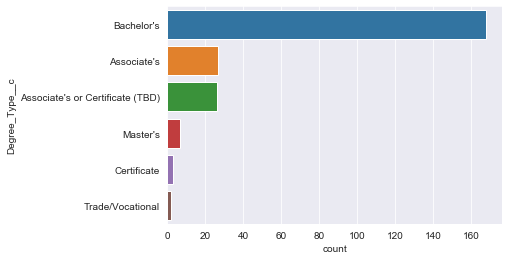

In [60]:
sns.countplot(y="Degree_Type__c", 
              data=graduated_student,
              order = graduated_student['Degree_Type__c'].value_counts().index)

### create some sub datasets

In [61]:
# students who persue Bachelor's degree
bachelor = graduated_student[graduated_student['Degree_Type__c'] == 'Bachelor\'s']
# students who persue Associate's
associate = graduated_student[graduated_student['Degree_Type__c'] == 'Associate\'s']
# students who persue Associate's or Certificate (TBD)
tbd = graduated_student[graduated_student['Degree_Type__c'] == "Associate's or Certificate (TBD)"]
# students who persue Master's degree
master = graduated_student[graduated_student['Degree_Type__c'] == "Master's"]

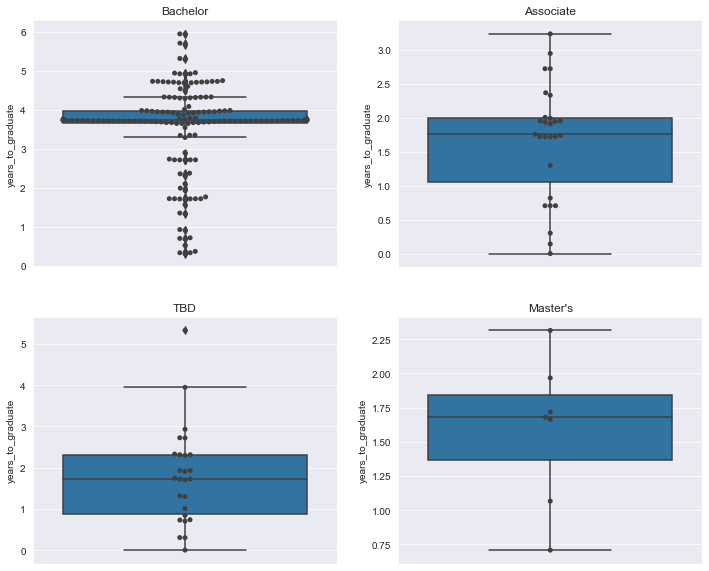

In [85]:
# plot
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax1.set_title("Bachelor")
ax1 = sns.boxplot(y=bachelor["years_to_graduate"])
ax1 = sns.swarmplot(y=bachelor["years_to_graduate"], color=".25")

ax2 = fig.add_subplot(222)
ax2.set_title("Associate")
ax2 = sns.boxplot(y=associate["years_to_graduate"])
ax2 = sns.swarmplot(y=associate["years_to_graduate"], color=".25")

ax3 = fig.add_subplot(223)
ax3.set_title("TBD")
ax3 = sns.boxplot(y=tbd["years_to_graduate"])
ax3 = sns.swarmplot(y=tbd["years_to_graduate"], color=".25")

ax4 = fig.add_subplot(224)
ax4.set_title("Master's")
ax4 = sns.boxplot(y=master["years_to_graduate"])
ax4 = sns.swarmplot(y=master["years_to_graduate"], color=".25")

### students who persue Certificate

In [73]:
certificate = graduated_student[graduated_student['Degree_Type__c'] == "Certificate"]

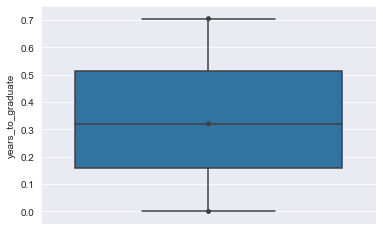

In [74]:
ax = sns.boxplot(y=certificate["years_to_graduate"])
ax = sns.swarmplot(y=certificate["years_to_graduate"], color=".25")

### students who persue Trade/Vocational

In [75]:
trade = graduated_student[graduated_student['Degree_Type__c'] == "Trade/Vocational"]

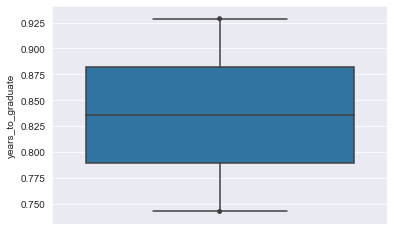

In [76]:
ax = sns.boxplot(y=trade["years_to_graduate"])
ax = sns.swarmplot(y=trade["years_to_graduate"], color=".25")

# NSC data

In [5]:
# read the file
nsc = pd.read_excel('UtmostU NSC Data_For DePaul.xlsx', 'Sheet1')

In [5]:
# convert to timestamp
nsc['Enrollment End'] = pd.to_datetime(nsc['Enrollment End'])
nsc['Enrollment Begin'] = pd.to_datetime(nsc['Enrollment Begin'])

In [6]:
nsc.shape

(7234, 16)

In [123]:
# write as csv file
# nsc.to_csv('NSC.csv', encoding='utf-8', index=False)

In [10]:
nsc.head()

,Fellow ID,College Code/Branch,College Name,College State,2-year / 4-year,Public / Private,Enrollment Begin,Enrollment End,Enrollment Status,Class Level,Enrollment Major 1,Graduated?,Graduation Date,Degree Title,Degree Major 1,Degree Major 2
0,00346000002iXXG,001709-00,LINCOLN COLLEGE,IL,4,Private,8/19/2013,12/14/2013,Full-time,NaN,Health Sciences & Technologies,N,NaN,NaN,NaN,NaN
1,00346000002iXXG,001709-00,LINCOLN COLLEGE,IL,4,Private,1/2/2014,5/31/2014,Full-time,NaN,Health Sciences & Technologies,N,NaN,NaN,NaN,NaN
2,00346000002iXdj,009767-00,CITY OF CHICAGO - OLIVE-HARVEY COLLEGE,IL,2,Public,6/3/2015,7/26/2015,Half-time,Freshman,NaN,N,NaN,NaN,NaN,NaN
3,00346000002iXdj,009767-00,CITY OF CHICAGO - OLIVE-HARVEY COLLEGE,IL,2,Public,1/19/2016,5/14/2016,Full-time,Freshman,NaN,N,NaN,NaN,NaN,NaN
4,00346000002iXdj,009767-00,CITY OF CHICAGO - OLIVE-HARVEY COLLEGE,IL,2,Public,8/29/2016,12/17/2016,Full-time,Sophomore,NaN,N,NaN,NaN,NaN,NaN


# EDA

In [151]:
#nsc.shape
nsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 16 columns):
Fellow ID              7234 non-null object
College Code/Branch    7234 non-null object
College Name           7234 non-null object
College State          7234 non-null object
2-year / 4-year        7234 non-null int64
Public / Private       7234 non-null object
Enrollment Begin       6875 non-null datetime64[ns]
Enrollment End         6875 non-null datetime64[ns]
Enrollment Status      7234 non-null object
Class Level            6102 non-null object
Enrollment Major 1     4013 non-null object
Graduated?             7234 non-null object
Graduation Date        359 non-null object
Degree Title           320 non-null object
Degree Major 1         317 non-null object
Degree Major 2         5 non-null object
dtypes: datetime64[ns](2), int64(1), object(13)
memory usage: 904.4+ KB


*Notes: 7234 rows, 16 cols*

In [154]:
nsc['Fellow ID'].nunique() # 1029 unique Fellow IDs

1029

### Check missing values

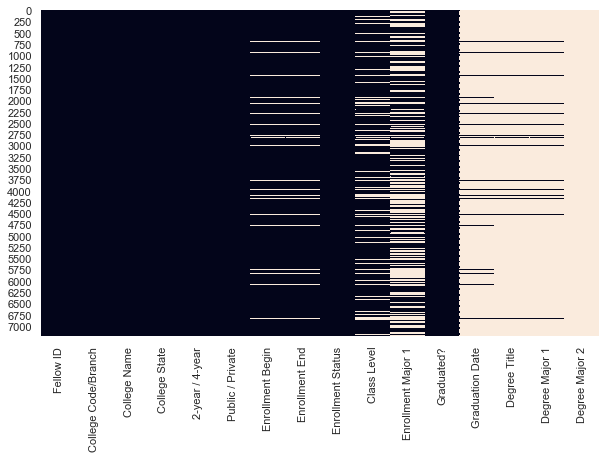

In [15]:
sns.set(rc={'figure.figsize':(10,6)}) # adjust figure size
sns.heatmap(nsc.isnull(), cbar=False)

In [17]:
total = nsc.isnull().sum().sort_values(ascending=False)
percent = (nsc.isnull().sum()/nsc.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data 

,Total Missing,Percent
Degree Major 2,7229,0.999309
Degree Major 1,6917,0.956179
Degree Title,6914,0.955764
Graduation Date,6875,0.950373
Enrollment Major 1,3221,0.445259
Class Level,1132,0.156483
Enrollment End,359,0.049627
Enrollment Begin,359,0.049627
Graduated?,0,0.000000
Enrollment Status,0,0.000000


**some notes (Shayna):**
- Row F(Public / Private?), “Class Level”?, may not be super helpful
- In columns that indicate graduation date, there will be no information in rows G-K, but rather, the information will be in rows M-P.
- Rows I-K (Enrollment Status, Class Level, Enrollment Major 1) Can leave that as null

**other notes:**
*in most cases, if a fellow graduated, there will be a graduation date, as well as degree title and major. but: Graduation Date(359)> Degree Title(320)?*
- because some students have more than one graduation dates (but very close), and only one of the graudation date has a degree title
- very few have a graduation date but no degree title (00346000002iXeF)

In [28]:
# check each fellow
#temp = nsc.loc[nsc['Fellow ID'] == '00346000002iXeF']
#temp

In [ ]:
# some students'education journey
# struggled students:
# 00346000002iWAo
# 00346000002iXaN (2 -> 4)

# Normal students:
# 00346000002iXYO
# 00346000002iXXi

# Motivated students (master)
# 00346000002iXXI

# 4 -> 2:
# 00346000002iXa3

# 2 -> 4:
# 0034p00001iGQ6m

# 4 -> 2 -> 4:
# 00346000002iXdj

# Data clean log

In [9]:
# make a copy
nsc_copy = nsc.copy()

In [10]:
nsc_copy.shape

(7234, 16)

### 1) Remove rows whose class level is *High School Scholar*

In [11]:
# drop rows whose class level is High School Scholar
nsc_copy = nsc_copy.drop(nsc_copy[(nsc_copy['Class Level'] == 'High School Scholar')].index)

In [12]:
# nsc_copy.shape
# 17 rows removed

### 2) For *students* who have both advanced certificate and basic certificate, only keep advanced certificate 

In [13]:
certificate = nsc[nsc['Degree Title'].str.contains("CERT", na=False)]

In [14]:
# there are 40 rows in total. All these fellows got at least one certificate. 
# DIPLOMA --> certificate (00346000002iXcS) only one fellow
certificate.shape

(40, 16)

In [15]:
certificate['Degree Title'].value_counts()

BASIC CERTIFICATE            30
CERTIFICATE                   4
ADVANCED CERTIFICATE          3
UNDERGRADUATE CERTIFICATE     1
CERTIFICATE IN WRITING        1
CERT                          1
Name: Degree Title, dtype: int64

In [16]:
# find the fellows who earned advanced certificate
fellow_ad_cert = nsc.loc[nsc['Degree Title'] == 'ADVANCED CERTIFICATE']
fellow_ad_cert

,Fellow ID,College Code/Branch,College Name,College State,2-year / 4-year,Public / Private,Enrollment Begin,Enrollment End,Enrollment Status,Class Level,Enrollment Major 1,Graduated?,Graduation Date,Degree Title,Degree Major 1,Degree Major 2
376,0034p00001iGQ6m,001650-00,CITY OF CHICAGO - MALCOLM X COLLEGE,IL,2,Public,NaN,NaN,,NaN,NaN,Y,5/15/2021,ADVANCED CERTIFICATE,Education,NaN
982,0034600001EXcUB,001654-00,CITY OF CHICAGO - KENNEDY-KING COLLEGE,IL,2,Public,NaN,NaN,,NaN,NaN,Y,12/14/2019,ADVANCED CERTIFICATE,"Repair, Production, & Construction",NaN
2764,00346000002iXd2,009767-00,CITY OF CHICAGO - OLIVE-HARVEY COLLEGE,IL,2,Public,NaN,NaN,,NaN,NaN,Y,5/11/2019,ADVANCED CERTIFICATE,Education,NaN


In [17]:
# drop rows
nsc_copy = nsc_copy.drop(nsc_copy[(nsc_copy['Fellow ID'] == '0034p00001iGQ6m') & (nsc_copy['Degree Title'] == 'BASIC CERTIFICATE')].index)
nsc_copy = nsc_copy.drop(nsc_copy[(nsc_copy['Fellow ID'] == '0034600001EXcUB') & (nsc_copy['Degree Title'] == 'BASIC CERTIFICATE')].index)
nsc_copy = nsc_copy.drop(nsc_copy[(nsc_copy['Fellow ID'] == '00346000002iXd2') & (nsc_copy['Degree Title'] == 'BASIC CERTIFICATE')].index)

In [18]:
# nsc_copy.shape
# 5 rows removed

### 3) remove rows which have graudation date but no degree type

In [19]:
graduated_fellow = nsc.loc[nsc['Graduated?'] == 'Y']

In [20]:
# graduated_fellow.head()

In [21]:
# fellows who have more than one graduation records
counts = graduated_fellow['Fellow ID'].value_counts()
graduated_fellow_more_than_one = graduated_fellow[graduated_fellow['Fellow ID'].isin(counts.index[counts > 1])]

In [22]:
graduated_fellow_more_than_one['Fellow ID'].unique()

array(['0034p00001huqzw', '00346000002iXbP', '00346000002iXf4',
       '0034p00001iGQ6m', '00346000002iXan', '00346000002iXes',
       '00346000002iXXW', '00346000002iXcp', '00346000002iXZM',
       '0034p00001iGQ5v', '00346000002iXZR', '0034600001EXcUB',
       '00346000002iXXU', '0034p00001iGQ61', '00346000002iXXI',
       '00346000002iXZF', '00346000002iXev', '00346000002iXZt',
       '00346000002iXco', '00346000002iXXB', '00346000002iXYx',
       '00346000002iXa3', '00346000002iWAj', '0034p00001jVylT',
       '00346000002iWOw', '00346000002iXd2', '00346000002iXZZ',
       '00346000002iW9n', '00346000002iXaZ', '00346000002iXbo',
       '00346000002iXcJ', '00346000002iXaO', '0034p00001huJkF',
       '00346000002iXZb', '00346000002iXbZ', '00346000002iXaD',
       '00346000002iXbN', '00346000002iXZc', '00346000002iXZq',
       '00346000002iWAF', '00346000002iXdX', '0034p00001iGQ5e',
       '00346000002iXaE', '00346000002iXcP', '0034600000iXknH',
       '00346000002iXbL', '0034600001EXc

**We found that if there is a graduation date but no degree title, in most cases, this is because the graduation date is trying to record the last date of the last semester. There will be another row recording both actuall graduation date and degree title. Therefore, we can remove those rows which have graduation date but no degree title.**

In [23]:
# drop those rows which have a graduation date but no degree title
nsc_copy = nsc_copy.drop(nsc_copy[(nsc_copy['Graduated?'] == 'Y') & (nsc_copy['Degree Title'].isnull())].index)

In [24]:
# nsc_copy.shape
# 39 rows removed

**the following fellows are removed:**
['0034p00001jVEU7', '0034600001EXcSa', '00346000002iWAv', '00346000002iXbv', '00346000002iXeF']

*they only have one record which has a graduation date but no degree type. They cannot be used to compute duration anyways. So removed.*

**conclusion:**
- removed 17 rows --> high school scholar
- removed 5 rows --> basic certificate
- removed 39 rows --> have graduation date but no degree type (most are reduplications)

In [35]:
# write as csv file
# nsc_copy.to_csv('NSC_new_version_1025.csv', encoding='utf-8', index=False)

# Pacing

### Tracking start date of their first semester as a college student

In [246]:
first_semester = nsc.loc[nsc.groupby(nsc['Fellow ID'], as_index = False)['Enrollment Begin'].idxmin()]

In [266]:
first_semester.head()

,Fellow ID,College Code/Branch,College Name,College State,2-year / 4-year,Public / Private,Enrollment Begin,Enrollment End,Enrollment Status,Class Level,Enrollment Major 1,Graduated?,Graduation Date,Degree Title,Degree Major 1,Degree Major 2,Month,Year,First_semester_start
5049,00346000002iW9l,001674-00,EASTERN ILLINOIS UNIVERSITY,IL,4,Public,2013-08-14,2013-12-16,Full-time,NaN,NaN,N,NaN,NaN,NaN,NaN,8,2013,2013-08-01
5041,00346000002iW9m,001594-00,SPELMAN COLLEGE,GA,4,Private,2013-08-21,2013-12-13,Full-time,NaN,NaN,N,NaN,NaN,NaN,NaN,8,2013,2013-08-01
2972,00346000002iW9n,001775-00,UNIVERSITY OF ILLINOIS @ URBANA,IL,4,Public,2013-08-26,2013-12-20,Full-time,NaN,NaN,N,NaN,NaN,NaN,NaN,8,2013,2013-08-01
5332,00346000002iW9o,002920-00,DUKE UNIVERSITY,NC,4,Private,2013-08-26,2013-12-30,Full-time,NaN,NaN,N,NaN,NaN,NaN,NaN,8,2013,2013-08-01
4670,00346000002iW9p,001674-00,EASTERN ILLINOIS UNIVERSITY,IL,4,Public,2013-08-14,2013-12-16,Full-time,NaN,NaN,N,NaN,NaN,NaN,NaN,8,2013,2013-08-01


In [247]:
# each fellow start date of their first semester
first_semester['Enrollment Begin']

5049   2013-08-14
5041   2013-08-21
2972   2013-08-26
5332   2013-08-26
4670   2013-08-14
          ...    
3049   2021-08-23
3086   2021-08-30
6045   2021-08-23
1495   2021-08-23
3936   2021-08-25
Name: Enrollment Begin, Length: 1029, dtype: datetime64[ns]

In [253]:
# aggregate to month
first_semester['First_semester_start'] = first_semester['Enrollment Begin'].dt.strftime('%Y-%m')

In [257]:
first_semester['First_semester_start'] = pd.to_datetime(first_semester['First_semester_start'])

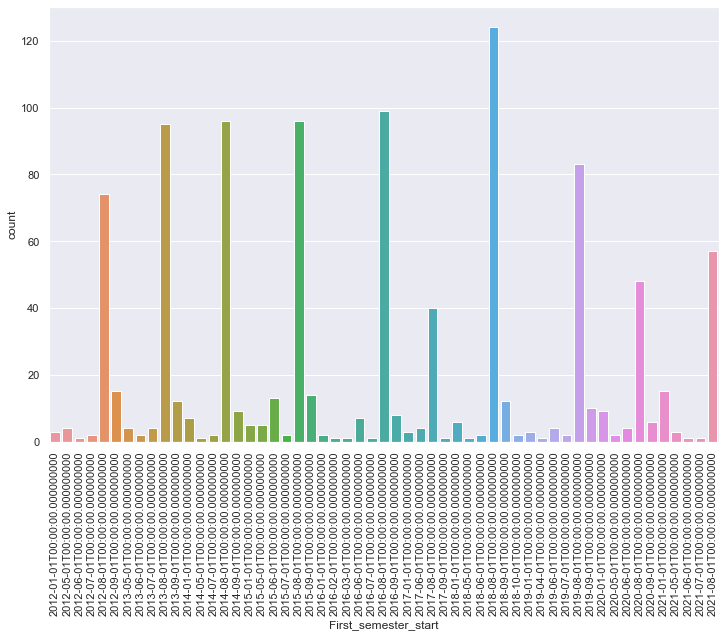

In [263]:
# this is a countplot: each fellow start date of their first semester
plt.figure(figsize=(12,8))
graph = sns.countplot(x="First_semester_start", data=first_semester)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.show()

**Conclusion**
- We found that the first-semester-start-date ranges from 2012/01 to 2021/08
- Most fellows enroll in Aug or Sept
- 2017 and 2020 has the lowest enrollments

### Track number of actual degrees and certificates received

In [42]:
nsc['Degree Title'].unique()

array([nan, 'ASSOCIATE IN ARTS', 'ASSOCIATE OF ARTS', 'GECC CREDENTIAL',
       'BACHELOR OF ARTS', 'BACHELOR OF SOCIAL WORK',
       'BACHELOR OF SCIENCE', 'CERT', 'BASIC CERTIFICATE',
       'ADVANCED CERTIFICATE', 'BA  LIBERAL ARTS AND SCIENCE', 'B.A.',
       'MASTER OF SCIENCE', 'MASTER OF ARTS IN SPORTS ADMIN',
       'ASSOCIATE IN APPLIED SCIENCE', 'ASSOCIATE IN GENERAL STUDIES',
       'ARTIUM BACCALAUREI', 'MASTER OF EDUCATION', 'MASTER OF ARTS',
       'BS  LIBERAL ARTS AND SCIENCE', 'MASTER OF ARTS IN TEACHING',
       'B.S. IN BUSINESS ADMINISTRATION', 'MASTER OF SOCIAL WORK',
       'ASSOCIATE IN SCIENCE', 'BACHELOR OF GENERAL STUDIES',
       'ASSOCIATE OF SCIENCE', 'BACHELOR OF SCIENCE IN EDUCATION',
       'BACHELOR OF FINE ARTS', 'CERTIFICATE IN WRITING', 'BA',
       'BACHELOR OF ARTS EDUCATION', 'JURIS DOCTOR', 'CERTIFICATE', 'MPH',
       'BS', 'BACHELOR OF SCIENCE IN ENGINEERING INDUST & OPER E',
       'ASSOCIATE OF APPLIED SCIENCE', 'B.A. IN BEHAVIORAL SCIENCES',

- *GECC CREDENTIAL: the General Education Core Curriculum (GECC) Credential is an award provided by a community college for completion of the 37 to 41 credit hours which satisfy the GECC of the Illinois Articulation Initiative (IAI).*
- *BSB/FP: Bachelor of Science in Business / Bachelor of Science in Financial Planning*
- *MPH: A Master of Public Health*
- *ARTIUM BACCALAUREI --> Bachelor of Arts*
- *DIPLOMA --> certificate (00346000002iXcS) only one fellow*
- *MINOR DEGREE: An academic minor degree is a university or college student's secondary declared academic discipline or field of study for their undergraduate degree. ... Minor degree refers to a supplemental second discipline of study and concentration that often complements the major. (00346000002iWAA)*

In [76]:
# create a df contians 'Degree Title'
contian_Degree_Title = nsc.loc[nsc['Degree Title'].notnull()]

# contian_Degree_Title['Degree Title'].nunique() -- 54 unique values 
# contian_Degree_Title['Fellow ID'].nunique() -- 258(/340) unique values: some fellows may have more than one degree

In [73]:
# combine degrees into five big categories: bachelor; associate; master; certificate; JD


In [84]:
def classify(x):
    if x[0] == 'M' and x[1] != 'I':
        return 'Master'
    elif x[0] == 'A' and x[1] == 'S':
        return 'Associate'
    elif 'CERT' in x  or 'DIPLOMA' in x:
        return 'Certificate'
    elif 'JURIS' in x:
        return 'JD'
    elif x == 'MINOR DEGREE':
        return 'MINOR DEGREE'
    elif x == 'GECC CREDENTIAL':
        return 'GECC CREDENTIAL'
    else:
        return 'Bachelor'

In [85]:
contian_Degree_Title['gen_degree'] = contian_Degree_Title['Degree Title'].apply(classify)

In [89]:
# check
#contian_Degree_Title[contian_Degree_Title['gen_degree'] == 'MINOR DEGREE']

In [91]:
# contian_Degree_Title.head(10)

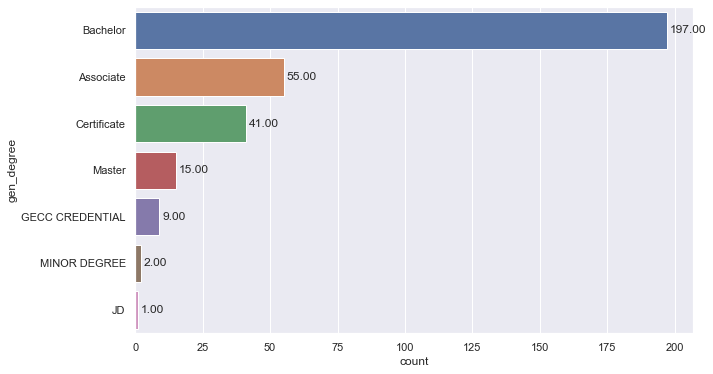

In [104]:
ax = sns.countplot(y="gen_degree", 
              data=contian_Degree_Title,
              order = contian_Degree_Title['gen_degree'].value_counts().index)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

### Fellows who have grduation record

In [106]:
graduated_fellow = nsc.loc[nsc['Graduated?'] == 'Y']

In [267]:
graduated_fellow.head()

,Fellow ID,College Code/Branch,College Name,College State,2-year / 4-year,Public / Private,Enrollment Begin,Enrollment End,Enrollment Status,Class Level,Enrollment Major 1,Graduated?,Graduation Date,Degree Title,Degree Major 1,Degree Major 2
8,00346000002iXdj,009767-00,CITY OF CHICAGO - OLIVE-HARVEY COLLEGE,IL,2,Public,NaN,NaN,,NaN,NaN,Y,5/12/2018,ASSOCIATE IN ARTS,"Graphic, Visual & Performing Arts",NaN
30,0034600001EXcSL,001709-00,LINCOLN COLLEGE,IL,4,Private,NaN,NaN,,NaN,NaN,Y,8/8/2020,ASSOCIATE OF ARTS,General Studies,NaN
48,0034p00001huqzw,001649-00,CITY OF CHICAGO - RICHARD J. DALEY COLLEGE,IL,2,Public,NaN,NaN,,NaN,NaN,Y,5/15/2021,ASSOCIATE IN ARTS,"Accounting, Economics & Finance",NaN
49,0034p00001huqzw,001649-00,CITY OF CHICAGO - RICHARD J. DALEY COLLEGE,IL,2,Public,NaN,NaN,,NaN,NaN,Y,5/15/2021,GECC CREDENTIAL,General Studies,NaN
61,00346000002iXbP,001652-00,CITY OF CHICAGO - HAROLD WASHINGTON COLLEGE,IL,2,Public,NaN,NaN,,NaN,NaN,Y,12/14/2019,GECC CREDENTIAL,General Studies,NaN


In [111]:
# graduated_fellow['Fellow ID'].nunique() -- 263 unique IDs

In [113]:
# graduated_fellow.count() -- 359 total records

In [116]:
# fellows who have more than one graduation records
counts = graduated_fellow['Fellow ID'].value_counts()
graduated_fellow_more_than_one = graduated_fellow[graduated_fellow['Fellow ID'].isin(counts.index[counts > 1])]

In [119]:
graduated_fellow_more_than_one['Fellow ID'].unique()

array(['0034p00001huqzw', '00346000002iXbP', '00346000002iXf4',
       '0034p00001iGQ6m', '00346000002iXan', '00346000002iXes',
       '00346000002iXXW', '00346000002iXcp', '00346000002iXZM',
       '0034p00001iGQ5v', '00346000002iXZR', '0034600001EXcUB',
       '00346000002iXXU', '0034p00001iGQ61', '00346000002iXXI',
       '00346000002iXZF', '00346000002iXev', '00346000002iXZt',
       '00346000002iXco', '00346000002iXXB', '00346000002iXYx',
       '00346000002iXa3', '00346000002iWAj', '0034p00001jVylT',
       '00346000002iWOw', '00346000002iXd2', '00346000002iXZZ',
       '00346000002iW9n', '00346000002iXaZ', '00346000002iXbo',
       '00346000002iXcJ', '00346000002iXaO', '0034p00001huJkF',
       '00346000002iXZb', '00346000002iXbZ', '00346000002iXaD',
       '00346000002iXbN', '00346000002iXZc', '00346000002iXZq',
       '00346000002iWAF', '00346000002iXdX', '0034p00001iGQ5e',
       '00346000002iXaE', '00346000002iXcP', '0034600000iXknH',
       '00346000002iXbL', '0034600001EXc

**We found that if there is a graduation date but no degree title, in most cases, this is because the graduation date is trying to record the last date of the last semester. There will be another row recording both actuall graduation date and degree title. Therefore, we can remove those rows which have graduation date but no degree title.**

In [137]:
# this is a test... Make a copy
graduated_fellow_copy = graduated_fellow.copy()

In [138]:
graduated_fellow_copy.shape

(359, 16)

In [140]:
# drop those rows which have a graduation date but no degree title
graduated_fellow_copy = graduated_fellow_copy.drop(graduated_fellow_copy[(graduated_fellow_copy['Graduated?'] == 'Y') & (graduated_fellow_copy['Degree Title'].isnull())].index)

In [141]:
# 39 rows are removed
graduated_fellow_copy.shape

(320, 16)

In [277]:
graduated_fellow['Fellow ID'].nunique()

263

In [271]:
# there are still 258 unique fellow IDs. (previously, there are 263)
# the following fellows are removed:
# ['0034p00001jVEU7', '0034600001EXcSa', '00346000002iWAv', '00346000002iXbv', '00346000002iXeF']
graduated_fellow_copy['Fellow ID'].nunique()

258

In [278]:
# try to find these five fellows
lst = []
for i in graduated_fellow['Fellow ID'].unique():
    if i not in (graduated_fellow_copy['Fellow ID'].unique()):
        lst.append(i)

print (lst)

['0034p00001jVEU7', '0034600001EXcSa', '00346000002iWAv', '00346000002iXbv', '00346000002iXeF']


**Conclusion: This should be applied to the original dataset -- nsc (remove 39 rows)**

In [280]:
graduated_fellow_copy['Fellow ID'].unique()

array(['00346000002iXdj', '0034600001EXcSL', '0034p00001huqzw',
       '00346000002iXbP', '00346000002iXYO', '00346000002iXWs',
       '00346000002iXYZ', '00346000002iXbC', '00346000002iXYw',
       '00346000002iXZ1', '0034p00001jVESC', '00346000002iW9q',
       '00346000002iWOP', '00346000002iXf4', '00346000002iWOV',
       '00346000002iXaP', '0034p00001iGQ6m', '00346000002iXa9',
       '00346000002iXan', '00346000002iXa5', '00346000002iXal',
       '00346000002iXZD', '00346000002iXYl', '00346000002iXes',
       '00346000002iXYH', '00346000002iXaL', '00346000002iXey',
       '00346000002iXXW', '00346000002iXcp', '00346000002iXd4',
       '00346000002iXZM', '0034p00001iGQ5v', '00346000002iXZR',
       '0034p00001jVES9', '0034600001EXcUB', '00346000002iXaJ',
       '00346000002iXd0', '00346000002iXef', '00346000002iXfS',
       '00346000002iXcu', '00346000002iXXU', '00346000002iXZd',
       '00346000002iWAy', '00346000002iXYS', '00346000002iXXp',
       '0034600001YKVxj', '00346000002iX

## Pacing: for graduated fellows, how long time it takes to get a degree

In [3]:
nsc = pd.read_csv('NSC_new_version_1026.csv')
nsc.shape

(7158, 16)

In [4]:
# convert to timestamp
nsc['Enrollment End'] = pd.to_datetime(nsc['Enrollment End'])
nsc['Enrollment Begin'] = pd.to_datetime(nsc['Enrollment Begin'])

**sub dataset --> only include fellows who have graduation record**

In [5]:
temp = nsc.groupby(["Fellow ID", "Graduated?"]).count().reset_index()
temp.shape

(1287, 16)

In [6]:
graduate_fellow_id = temp.groupby('Fellow ID').filter(lambda x : x['Fellow ID'].shape[0]>=2)['Fellow ID'].unique()

In [7]:
graduated_fellow = nsc[nsc['Fellow ID'].isin(graduate_fellow_id.tolist())]

In [8]:
## this is the newest dataset for further analysis
graduated_fellow.shape

(3270, 16)

In [9]:
## this is the newest dataset for further analysis
graduated_fellow['Fellow ID'].nunique()

258

In [10]:
graduated_fellow[graduated_fellow['Fellow ID'] == '00346000002iXcJ']

,Fellow ID,College Code/Branch,College Name,College State,2-year / 4-year,Public / Private,Enrollment Begin,Enrollment End,Enrollment Status,Class Level,Enrollment Major 1,Graduated?,Graduation Date,Degree Title,Degree Major 1,Degree Major 2
3327,00346000002iXcJ,009917-00,IVY TECH COMMUNITY COLLEGE,IN,2,Public,2015-08-24,2015-12-19,Three-quarter time,Freshman,"Repair, Production, & Construction",N,NaN,NaN,NaN,NaN
3328,00346000002iXcJ,009917-00,IVY TECH COMMUNITY COLLEGE,IN,2,Public,2016-01-11,2016-05-07,Full-time,Freshman,"Repair, Production, & Construction",N,NaN,NaN,NaN,NaN
3329,00346000002iXcJ,009917-00,IVY TECH COMMUNITY COLLEGE,IN,2,Public,2016-08-22,2016-12-17,Half-time,Freshman,"Repair, Production, & Construction",N,NaN,NaN,NaN,NaN
3330,00346000002iXcJ,009917-00,IVY TECH COMMUNITY COLLEGE,IN,2,Public,2017-01-17,2017-05-13,Half-time,Freshman,"Repair, Production, & Construction",N,NaN,NaN,NaN,NaN
3331,00346000002iXcJ,009917-00,IVY TECH COMMUNITY COLLEGE,IN,2,Public,NaT,NaT,,NaN,NaN,Y,7/29/2017,CERTIFICATE,"Repair, Production, & Construction",NaN
3332,00346000002iXcJ,007692-00,MORAINE VALLEY COMMUNITY COLLEGE,IL,2,Public,2014-08-25,2014-12-19,Full-time,NaN,"Repair, Production, & Construction",N,NaN,NaN,NaN,NaN


In [82]:
########### DO NOT RUN this part!!! ########### 

In [83]:
# try to find very close graduation date
temp = graduated_fellow[graduated_fellow['Graduation Date'].notnull()]

In [84]:
# 47 fellows have more than one graduation dates
df = temp[temp['Fellow ID'].map(temp['Fellow ID'].value_counts() > 1)]
df['Fellow ID'].nunique()

39

In [85]:
temp['Data_lagged'] = (temp.sort_values(by=['Graduation Date'], ascending=True)
                       .groupby(['Fellow ID'])['Graduation Date'].shift(1))

In [86]:
temp['Data_lagged'] = pd.to_datetime(temp['Data_lagged'])
temp['Graduation Date'] = pd.to_datetime(temp['Graduation Date'])

In [87]:
temp['Diff'] = (temp['Data_lagged'] - temp['Graduation Date']).dt.days

In [88]:
temp = temp.loc[(temp['Diff'] <= 10) & (temp['Diff'] >= 0)]

In [89]:
df = temp[(temp['Diff'] < 10) & (temp['Diff'] >= 0)]
# df.shape
# those fellows need to be cleaned
df['Fellow ID'].unique()

array([], dtype=object)

In [90]:
temp = graduated_fellow.loc[graduated_fellow['Fellow ID'] == '00346000002iWAA']
# temp
# remove index [49,1494, 2119, 3070, 3493, 4533, 4964, 5684, 6520, 6521, 6799, 7099, 7100, 7101]

In [91]:
# remove_index = [49,1494, 2119, 3070, 3493, 4533, 4964, 5684, 6520, 6521, 6799, 7099, 7100, 7101]
remove_index = [49,1494, 5684, 6520, 6521]
graduated_fellow.drop(remove_index, inplace=True)

In [17]:
# this is the newest dataset for further analysis
graduated_fellow.shape

(3266, 16)

In [ ]:
########### end ###########

In [ ]:
########### start from here ###########

In [11]:
# return degree title
# a sorted list of graudation date:
# x = end_date

def get_degree_title(x):
    i = 0

    while i <= (len(grad_dict) - 1): # 0 < 1

        if x <= sorted(grad_dict.keys())[i]:
            return grad_dict.get(pd.Timestamp(sorted(grad_dict.keys())[i]))
        else:
            i += 1

In [12]:
# retrun graduation date
# a sorted list of graudation date:
# x = end_date

def get_graduation_date(x):
    i = 0

    while i <= (len(grad_dict) - 1): # 0 < 1

        if x <= sorted(grad_dict.keys())[i]:
            return pd.Timestamp(sorted(grad_dict.keys())[i])
        else:
            i += 1

In [13]:
FellowID_list = list(set(graduated_fellow['Fellow ID'].tolist()))

agg_grad=pd.DataFrame()

for i in range(len(FellowID_list)):
    
    ## get graduaction date, compare enroll end date with graduaction date
    f1 = graduated_fellow.loc[graduated_fellow['Fellow ID'] == FellowID_list[i]]
    f1['Graduation Date'] = pd.to_datetime(nsc['Graduation Date'])
    contain_grad_date = f1[f1['Graduation Date'].notnull()]
    grad_dict =dict(zip(contain_grad_date['Graduation Date'], contain_grad_date['Degree Title']))
    end_date = f1[f1['Enrollment End'].notnull()]['Enrollment End'].tolist()
    
    ## fill out degree title and graduation date for each row

    f1['Degree Title'].fillna(f1['Enrollment End'].apply(lambda x: get_degree_title(x)), inplace=True)
    f1['Graduation Date'].fillna(f1['Enrollment End'].apply(lambda x: get_graduation_date(x)), inplace=True)
    
    ##
    temp_df=pd.DataFrame(f1.groupby(['Fellow ID','Degree Title','Graduation Date'])['Enrollment Begin'].min().reset_index())
    agg_grad=agg_grad.append(temp_df)
    i=i+1
    

In [14]:
agg_grad['duration(year)'] = (agg_grad['Graduation Date'] - agg_grad['Enrollment Begin']).dt.days/365

In [15]:
agg_grad.reset_index(drop=True, inplace=True)

In [16]:
agg_grad.head()

,Fellow ID,Degree Title,Graduation Date,Enrollment Begin,duration(year)
0,00346000002iXX0,B.A. IN BEHAVIORAL SCIENCES,2020-06-18,2013-08-26,6.816438
1,00346000002iXc0,BACHELOR OF ARTS,2020-04-25,2016-08-29,3.657534
2,00346000002iW9q,BACHELOR OF SCIENCE,2017-08-07,2013-08-26,3.950685
3,00346000002iXez,BACHELOR OF SCIENCE,2020-05-09,2015-08-24,4.712329
4,00346000002iXX3,ASSOCIATE IN SCIENCE,2017-05-13,2013-08-19,3.734247


In [169]:
agg_grad.shape

(300, 6)

In [17]:
def classify(x):
    if x[0] == 'M' and x[1] != 'I':
        return 'Master'
    elif x[0] == 'A' and x[1] == 'S':
        return 'Associate'
    elif 'CERT' in x  or 'DIPLOMA' in x:
        return 'Certificate'
    elif 'JURIS' in x:
        return 'JD'
    elif x == 'MINOR DEGREE':
        return 'MINOR DEGREE'
    elif x == 'GECC CREDENTIAL':
        return 'GECC CREDENTIAL'
    else:
        return 'Bachelor'

In [18]:
agg_grad['Gen Degree Title'] = agg_grad['Degree Title'].apply(classify)

In [19]:
agg_grad['Gen Degree Title'].value_counts()

Bachelor           194
Associate           55
Certificate         30
Master              15
GECC CREDENTIAL      5
JD                   1
Name: Gen Degree Title, dtype: int64

In [20]:
agg_grad.head()

,Fellow ID,Degree Title,Graduation Date,Enrollment Begin,duration(year),Gen Degree Title
0,00346000002iXX0,B.A. IN BEHAVIORAL SCIENCES,2020-06-18,2013-08-26,6.816438,Bachelor
1,00346000002iXc0,BACHELOR OF ARTS,2020-04-25,2016-08-29,3.657534,Bachelor
2,00346000002iW9q,BACHELOR OF SCIENCE,2017-08-07,2013-08-26,3.950685,Bachelor
3,00346000002iXez,BACHELOR OF SCIENCE,2020-05-09,2015-08-24,4.712329,Bachelor
4,00346000002iXX3,ASSOCIATE IN SCIENCE,2017-05-13,2013-08-19,3.734247,Associate


<AxesSubplot:xlabel='Gen Degree Title', ylabel='duration(year)'>

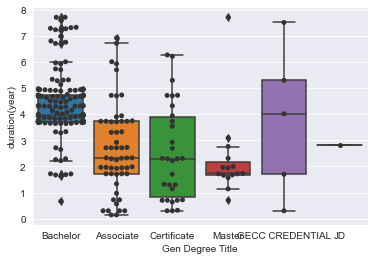

In [21]:
#create chart
#sns.set(rc={'figure.figsize':(12,10)}) 
sns.boxplot(x ="Gen Degree Title",
             y ="duration(year)",
             data = agg_grad)

sns.swarmplot(x ="Gen Degree Title", y ="duration(year)", data = agg_grad, color=".2")

In [134]:
# save file as csv
# agg_grad.to_csv('NSC_grad_duration_time_1031.csv', index=False)

## Journey: What are students' paths?

In [683]:
nsc.shape

(7158, 16)

In [684]:
# nsc['Fellow ID'].nunique() #1029

In [685]:
nsc.head()

,Fellow ID,College Code/Branch,College Name,College State,2-year / 4-year,Public / Private,Enrollment Begin,Enrollment End,Enrollment Status,Class Level,Enrollment Major 1,Graduated?,Graduation Date,Degree Title,Degree Major 1,Degree Major 2
0,00346000002iXXG,001709-00,LINCOLN COLLEGE,IL,4,Private,2013-08-19,2013-12-14,Full-time,NaN,Health Sciences & Technologies,N,NaN,NaN,NaN,NaN
1,00346000002iXXG,001709-00,LINCOLN COLLEGE,IL,4,Private,2014-01-02,2014-05-31,Full-time,NaN,Health Sciences & Technologies,N,NaN,NaN,NaN,NaN
2,00346000002iXdj,009767-00,CITY OF CHICAGO - OLIVE-HARVEY COLLEGE,IL,2,Public,2015-06-03,2015-07-26,Half-time,Freshman,NaN,N,NaN,NaN,NaN,NaN
3,00346000002iXdj,009767-00,CITY OF CHICAGO - OLIVE-HARVEY COLLEGE,IL,2,Public,2016-01-19,2016-05-14,Full-time,Freshman,NaN,N,NaN,NaN,NaN,NaN
4,00346000002iXdj,009767-00,CITY OF CHICAGO - OLIVE-HARVEY COLLEGE,IL,2,Public,2016-08-29,2016-12-17,Full-time,Sophomore,NaN,N,NaN,NaN,NaN,NaN


### Before generate a journey for each fellow. The following things need to be done
- 1) remove fellows whose latest enrollment begin is greater than 2021/08 (they are currently enrolled)
- 2) remove rows which have no enrollment begin data (AKA graduation records)

In [686]:
# 1） remove fellows whose latest enrollment begin is greater than 2021/08 (they are currently enrolled)

# collect fellow ID whose latest enroll begin date is greater than 2021-08-01
temp1 = nsc.groupby('Fellow ID').agg(Maximum_Date=('Enrollment Begin', np.max)).reset_index()
temp2 = temp1[temp1['Maximum_Date'] > '2021-08-01']

In [687]:
ID_remove = temp2['Fellow ID']

In [688]:
# ID_remove.shape # 272

In [690]:
nsc_new = nsc[~nsc['Fellow ID'].isin(ID_remove)]

In [691]:
# nsc_new['Fellow ID'].nunique() # 757  # 757+272=1029

In [692]:
nsc_new.shape

(5359, 16)

In [142]:
# for check later
# nsc.isna().sum()
# Enrollment Begin --> 300

In [693]:
# 2） remove rows which have no enrollment begin data (AKA graduation records)
nsc_no_gradDate = nsc_new.dropna(subset=['Enrollment Begin'])

In [694]:
# nsc_no_gradDate['Fellow ID'].nunique()  #757

In [695]:
nsc_no_gradDate.shape

(5103, 16)

In [696]:
nsc_no_gradDate.head()

,Fellow ID,College Code/Branch,College Name,College State,2-year / 4-year,Public / Private,Enrollment Begin,Enrollment End,Enrollment Status,Class Level,Enrollment Major 1,Graduated?,Graduation Date,Degree Title,Degree Major 1,Degree Major 2
0,00346000002iXXG,001709-00,LINCOLN COLLEGE,IL,4,Private,2013-08-19,2013-12-14,Full-time,NaN,Health Sciences & Technologies,N,NaN,NaN,NaN,NaN
1,00346000002iXXG,001709-00,LINCOLN COLLEGE,IL,4,Private,2014-01-02,2014-05-31,Full-time,NaN,Health Sciences & Technologies,N,NaN,NaN,NaN,NaN
2,00346000002iXdj,009767-00,CITY OF CHICAGO - OLIVE-HARVEY COLLEGE,IL,2,Public,2015-06-03,2015-07-26,Half-time,Freshman,NaN,N,NaN,NaN,NaN,NaN
3,00346000002iXdj,009767-00,CITY OF CHICAGO - OLIVE-HARVEY COLLEGE,IL,2,Public,2016-01-19,2016-05-14,Full-time,Freshman,NaN,N,NaN,NaN,NaN,NaN
4,00346000002iXdj,009767-00,CITY OF CHICAGO - OLIVE-HARVEY COLLEGE,IL,2,Public,2016-08-29,2016-12-17,Full-time,Sophomore,NaN,N,NaN,NaN,NaN,NaN


In [24]:
# nsc_no_gradDate.isna().sum()

### Generate a journey for each fellow

In [697]:
program_4_or_2 = nsc_no_gradDate.sort_values(by=['Enrollment Begin']).groupby(['Fellow ID'])['2-year / 4-year'].apply(list).reset_index()

In [698]:
program_4_or_2

,Fellow ID,2-year / 4-year
0,00346000002iW9l,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]"
1,00346000002iW9m,"[4, 4, 4, 4, 4, 4, 2, 4, 4]"
2,00346000002iW9n,"[4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2]"
3,00346000002iW9o,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
4,00346000002iW9p,"[4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4]"
...,...,...
752,0034p00001kMK1m,[2]
753,0034p00001kybPM,"[4, 4]"
754,0034p00001kybPO,"[4, 4, 4, 4, 4, 4]"
755,0034p00001kycJ4,[2]


In [272]:
# program_4_or_2.to_csv('NSC_4_2_year_program_1116.csv', index=False)

### Add tags
- If this fellow has no graduation record -> 0
- if this fellow graduated from a 2 yr program -> 2
- if this fellow graudated from a 4 yr program -> 4
- if this fellow has more than one graduation records, use the latest one

In [699]:
# program_4_or_2['Fellow ID'].nunique() # 757

In [700]:
graduated_fellow.shape

(3270, 16)

In [701]:
# generate tags
grad_record = graduated_fellow[graduated_fellow['Graduated?'] == 'Y']

In [702]:
# grad_record.shape # 300

In [703]:
# fill in the latest graduation date
latest_grad_record = grad_record[grad_record['Graduation Date'] == grad_record.groupby('Fellow ID')['Graduation Date'].transform('max')]

In [704]:
# latest_grad_record.shape  # 258

In [705]:
latest_grad_record['graduated'] = np.where(latest_grad_record['2-year / 4-year']== 4, 4, 2)

In [706]:
# ready for merge
latest_grad_record = latest_grad_record[['Fellow ID', 'graduated']]

In [707]:
# latest_grad_record.shape

In [ ]:
# now, add tags to the original table

In [708]:
program_4_or_2_new = program_4_or_2.merge(latest_grad_record, on='Fellow ID', how='left')

In [709]:
# check
# program_4_or_2_new.shape
# program_4_or_2_new['graduated'].isna().sum()  # 536 + 258 = 794  =\= 757
# do not match: that is because we removed those fellows who are currently enrolled. 
# some of them have graduation record

In [710]:
program_4_or_2_new = program_4_or_2_new.fillna(0)

In [711]:
# ready for segments
program_4_or_2_new.head()

,Fellow ID,2-year / 4-year,graduated
0,00346000002iW9l,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]",0.0
1,00346000002iW9m,"[4, 4, 4, 4, 4, 4, 2, 4, 4]",0.0
2,00346000002iW9n,"[4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2]",4.0
3,00346000002iW9o,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",4.0
4,00346000002iW9p,"[4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4]",4.0


### Visualization: heatmap

In [712]:
frame = []

for i in range(program_4_or_2_new['Fellow ID'].count()):
    df = pd.DataFrame(program_4_or_2_new['2-year / 4-year'][i])
    frame.append(df.T)

In [713]:
temp = pd.concat(frame).fillna(0).reset_index(drop=True)

In [714]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,4.0,4.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


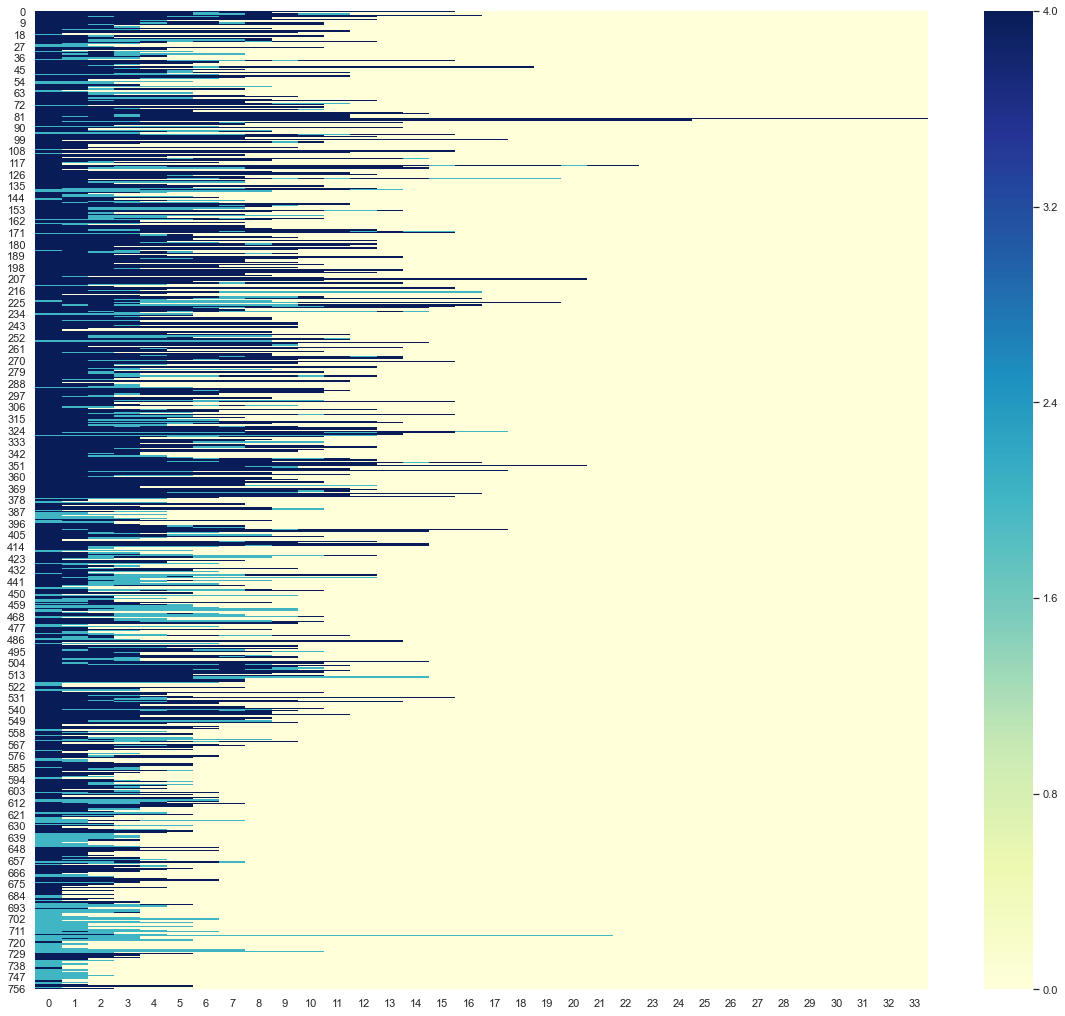

In [715]:
sns.set(rc={'figure.figsize':(20,18)})
ax = sns.heatmap(temp, cmap="YlGnBu")

In [716]:
program_4_or_2_new = program_4_or_2_new.merge(temp, how='outer', left_index=True, right_index=True)

In [717]:
program_4_or_2_new.shape

(757, 37)

In [718]:
program_4_or_2_new.head()

,Fellow ID,2-year / 4-year,graduated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,00346000002iW9l,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]",0.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00346000002iW9m,"[4, 4, 4, 4, 4, 4, 2, 4, 4]",0.0,4,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00346000002iW9n,"[4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2]",4.0,4,4.0,4.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00346000002iW9o,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",4.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00346000002iW9p,"[4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4]",4.0,4,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature engineering

In [719]:
# test: count how many transfers(2->4, 4->2) took place
lst = [4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 4]

In [30]:
def transfer_times(lst):
    if len(lst) == 0:
        pass
    else:
        seen = lst[0]
        cnt = 0
        
        for i in range(1, len(lst)):
            if seen == lst[i]:
                pass
            else: 
                cnt += 1
                seen = lst[i]
    return cnt

In [37]:
transfer_times(lst)

5

In [46]:
def prop_4(lst):
    l = len(lst)
    lst_4_cnt = 0
    
    for i in range(len(lst)):
        if lst[i] == 4:
            lst_4_cnt += 1
        else:pass
    
    prop_4 = lst_4_cnt/l
    return prop_4

In [51]:
prop_4(lst)

0.6666666666666666

In [52]:
def prop_2(lst):
    l = len(lst)
    lst_2_cnt = 0
    
    for i in range(len(lst)):
        if lst[i] == 2:
            lst_2_cnt += 1
        else:pass
    
    prop_2 = lst_2_cnt/l
    return prop_2

In [53]:
prop_2(lst)

0.3333333333333333

In [377]:
lst = [2, 2, 2, 2, 2, 2, 2, 2, 2]

In [389]:
import itertools

def length(lst):
    
    z = [(x[0], len(list(x[1]))) for x in itertools.groupby(lst)]

    lst_4 = []
    lst_2 = []
    for i in range(len(z)):
        if z[i][0] == 4:
            lst_4.append(z[i])
        if z[i][0] == 2:
            lst_2.append(z[i])
    
    if len(lst_4) != 0:
        max_4 = max(lst_4, key = lambda x : x[1])[1]
        min_4 = min(lst_4, key = lambda x : x[1])[1]
    else:
        max_4 = 0
        min_4 = 0
    
    if len(lst_2) != 0:
        max_2 = max(lst_2, key = lambda x : x[1])[1]
        min_2 = min(lst_2, key = lambda x : x[1])[1]
    else:
        max_2 = 0
        min_2 = 0
    
    return max_4, min_4, max_2, min_2

In [390]:
length(lst)

(0, 0, 9, 9)

In [139]:
lst = [2, 2, 2, 2, 2, 2, 2]

In [336]:
def start_end(lst):
    if lst[0] == lst[-1]:
        if lst[0] == 4:
            return ("start_4_end_4")
        if lst[0] == 2:
            return ("start_2_end_2")
    
    else:
        if (lst[0] == 4) and (lst[-1] == 2):
            return ("start_4_end_2")
        if (lst[0] == 2) and (lst[-1]) == 4:
            return ("start_2_end_4")      

In [337]:
start_end(lst)

'start_4_end_4'

#### feature_01: transfer times

In [720]:
program_4_or_2_new['transfer_times'] = program_4_or_2_new['2-year / 4-year'].apply(lambda x: transfer_times(x))

#### feature_02: prop_4

In [721]:
program_4_or_2_new['prop_4'] = program_4_or_2_new['2-year / 4-year'].apply(lambda x: prop_4(x))

#### feature_03: prop_2

In [722]:
program_4_or_2_new['prop_2'] = program_4_or_2_new['2-year / 4-year'].apply(lambda x: prop_2(x))

#### feature_04: start_end

In [723]:
program_4_or_2_new['start_end'] = program_4_or_2_new['2-year / 4-year'].apply(lambda x: start_end(x))

#### feature_05: length

In [724]:
program_4_or_2_new['max_4'] = program_4_or_2_new['2-year / 4-year'].apply(lambda x: length(x)[0])
program_4_or_2_new['min_4'] = program_4_or_2_new['2-year / 4-year'].apply(lambda x: length(x)[1])
program_4_or_2_new['max_2'] = program_4_or_2_new['2-year / 4-year'].apply(lambda x: length(x)[2])
program_4_or_2_new['min_2'] = program_4_or_2_new['2-year / 4-year'].apply(lambda x: length(x)[3])

In [725]:
# ready for visualization
program_4_or_2_new.head()

,Fellow ID,2-year / 4-year,graduated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,transfer_times,prop_4,prop_2,start_end,max_4,min_4,max_2,min_2
0,00346000002iW9l,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]",0.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.000000,0.000000,start_4_end_4,16,16,0,0
1,00346000002iW9m,"[4, 4, 4, 4, 4, 4, 2, 4, 4]",0.0,4,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.888889,0.111111,start_4_end_4,6,2,1,1
2,00346000002iW9n,"[4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2]",4.0,4,4.0,4.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.666667,0.333333,start_4_end_2,6,2,2,2
3,00346000002iW9o,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",4.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.000000,0.000000,start_4_end_4,17,17,0,0
4,00346000002iW9p,"[4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4]",4.0,4,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.769231,0.230769,start_4_end_4,6,2,2,1


In [726]:
# write as csv file
# program_4_or_2_new.to_csv('program_4_or_2_1117.csv', encoding='utf-8', index=False)

### Visualization

<AxesSubplot:xlabel='start_end', ylabel='count'>

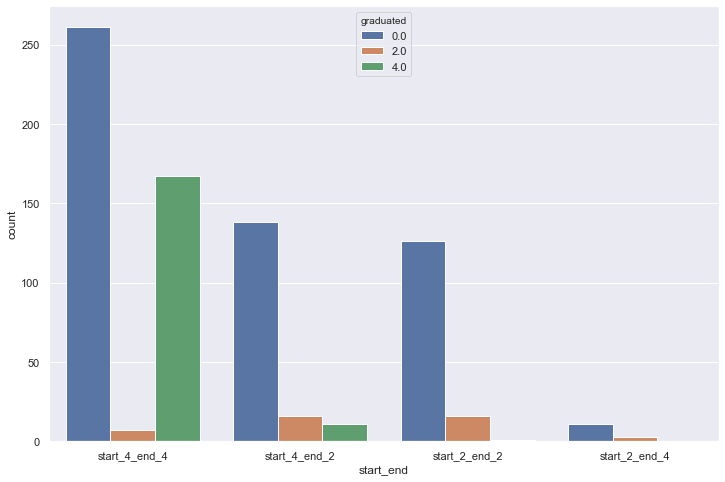

In [727]:
# set the figure size
plt.figure(figsize=(12, 8))
sns.countplot(x="start_end", data=program_4_or_2_new, hue="graduated")

#### Stacked percentage bar plot

In [728]:
# from raw value to percentage
total = program_4_or_2_new.groupby('start_end')['Fellow ID'].count().reset_index()

In [729]:
# from raw value to percentage
grad_0 = program_4_or_2_new[program_4_or_2_new['graduated'] == 0].groupby('start_end')['Fellow ID'].count().reset_index()
grad_2 = program_4_or_2_new[program_4_or_2_new['graduated'] == 2].groupby('start_end')['Fellow ID'].count().reset_index()
grad_4 = program_4_or_2_new[program_4_or_2_new['graduated'] == 4].groupby('start_end')['Fellow ID'].count().reset_index()

In [730]:
# manually add
grad_4.loc[3] = ['start_2_end_4', 0]

In [731]:
# swap
a, b = grad_4.iloc[2].copy(), grad_4.iloc[3].copy()
grad_4.iloc[2], grad_4.iloc[3] = b,a
# swap again
c, d = grad_4.iloc[1].copy(), grad_4.iloc[2].copy()
grad_4.iloc[1], grad_4.iloc[2] = d, c

In [732]:
# check
# grad_4

In [733]:
grad_0['percentage'] = [i / j * 100 for i,j in zip(grad_0['Fellow ID'], total['Fellow ID'])]
grad_2['percentage'] = [i / j * 100 for i,j in zip(grad_2['Fellow ID'], total['Fellow ID'])]
grad_4['percentage'] = [i / j * 100 for i,j in zip(grad_4['Fellow ID'], total['Fellow ID'])]

In [734]:
total['percentage'] = [i / j * 100 for i,j in zip(total['Fellow ID'], total['Fellow ID'])]

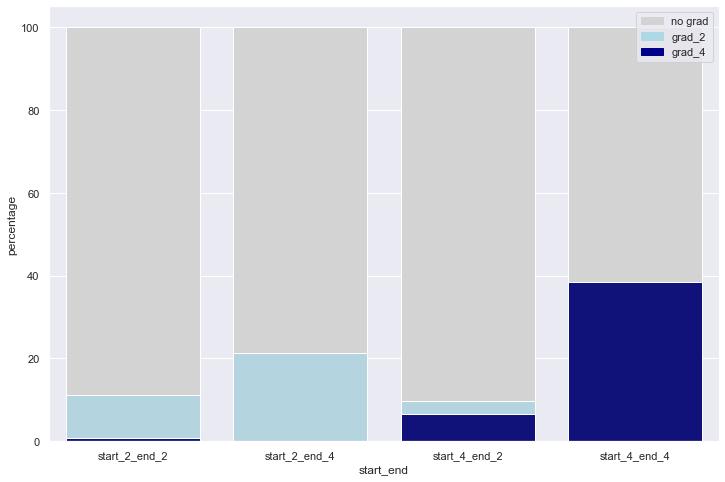

In [736]:
# set the figure size
plt.figure(figsize=(12, 8))

# bar chart
bar2 = sns.barplot(x="start_end", y="percentage", data=total, color='lightgray')
bar1 = sns.barplot(x="start_end",  y="percentage", data=grad_2, color='lightblue')
bar3 = sns.barplot(x="start_end", y="percentage", data=grad_4, color='darkblue')

import matplotlib.patches as mpatches
bottom_bar = mpatches.Patch(color='darkblue', label='grad_4')
mid_bar = mpatches.Patch(color='lightblue', label='grad_2')
top_bar = mpatches.Patch(color='lightgray', label='no grad')
plt.legend(handles=[top_bar, mid_bar, bottom_bar])